In [1]:
!pip install git+https://github.com/Frankothe196/auto-sklearn.git@python3.10-added-compatibility

  Cloning https://github.com/Frankothe196/auto-sklearn.git (to revision python3.10-added-compatibility) to /tmp/pip-req-build-17ip_94c
  Running command git clone --filter=blob:none --quiet https://github.com/Frankothe196/auto-sklearn.git /tmp/pip-req-build-17ip_94c
  Running command git checkout -b python3.10-added-compatibility --track origin/python3.10-added-compatibility
  Switched to a new branch 'python3.10-added-compatibility'
  Branch 'python3.10-added-compatibility' set up to track remote branch 'python3.10-added-compatibility' from 'origin'.
  Resolved https://github.com/Frankothe196/auto-sklearn.git to commit 80a575760e99945fa31970b1479edeb759bc645a
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.0 MB/s eta 0:00:00
  Preparing met

In [2]:
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print("RF Accuracy", sklearn.metrics.accuracy_score(y_test, y_hat))

RF Accuracy 0.67


In [4]:
from autosklearn.classification import AutoSklearnClassifier

automl = AutoSklearnClassifier(time_left_for_this_task=300)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("AutoML Accuracy", sklearn.metrics.accuracy_score(y_test, y_hat))

Fitting to the training data:   0%|          | 0/300 [00:00<?, ?it/s, The total time budget for this task is 0:05:00]/usr/local/lib/python3.10/dist-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(
Fitting to the training data: 100%|██████████| 300/300 [04:55<00:00,  1.01it/s, The total time budget for this task is 0:05:00]


AutoML Accuracy 0.65


In [ ]:
automl.get_params()

{'allow_string_features': True,
 'dask_client': None,
 'dataset_compression': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'disable_progress_bar': False,
 'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
 'ensemble_kwargs': None,
 'ensemble_nbest': 50,
 'ensemble_size': None,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': None,
 'per_run_time_limit': 30,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 300,
 'tmp_folder': None}

In [ ]:
automl.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.30808080808080807,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x79b85d4ce830>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x79b85d4cff70>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x79b85d4cc610>,
  'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                         random_state=1, warm_start=True)},
 11: {'model_id': 11,
  'rank': 16,
  'cost': 0.36363636363636365,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x79b85d837ee0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x79b8

In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: class, Length: 1599, dtype: category
Categories (6, object): ['3', '4', '5', '6', '7', '8']

In [ ]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
corr_related = X.corr()

<Axes: >

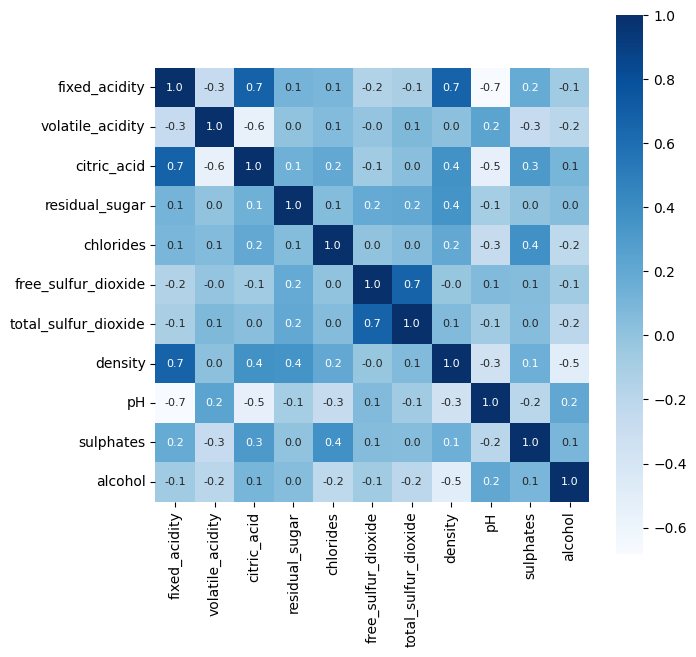

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(corr_related, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [ ]:
y.value_counts()

class
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)

rng = np.random.RandomState()

# Convert X and y to pandas DataFrames if needed
X = pd.DataFrame(X)
y = pd.Series(y)

# Display information about the dataset
print(X.info())
print(X.describe())
print(y.value_counts(normalize=True))

# Apply SMOTE for oversampling
oversample = SMOTE(random_state=rng)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=rng, stratify=y_resampled)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=rng)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print("RF Accuracy:", sklearn.metrics.accuracy_score(y_test, y_hat))

# Train and evaluate AutoSklearnClassifier
automl = AutoSklearnClassifier(time_left_for_this_task=300)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("AutoML Accuracy:", sklearn.metrics.accuracy_score(y_test, y_hat))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821  

Fitting to the training data:   0%|          | 0/300 [00:00<?, ?it/s, The total time budget for this task is 0:05:00]/usr/local/lib/python3.10/dist-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(
Fitting to the training data: 100%|██████████| 300/300 [04:52<00:00,  1.03it/s, The total time budget for this task is 0:05:00]


AutoML Accuracy: 0.8532289628180039


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)

rng = np.random.RandomState()

# Convert X and y to pandas DataFrames if needed
X = pd.DataFrame(X)
y = pd.Series(y)

# Display information about the dataset
print(X.info())
print(X.describe())
print(y.value_counts(normalize=True))

# Apply SMOTE for oversampling
oversample = SMOTE(random_state=rng)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=rng, stratify=y_resampled)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=rng)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print("RF Accuracy:", sklearn.metrics.accuracy_score(y_test, y_hat))

# Train and evaluate AutoSklearnClassifier
automl = AutoSklearnClassifier(time_left_for_this_task=300)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("AutoML Accuracy:", sklearn.metrics.accuracy_score(y_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821  

Fitting to the training data:   0%|          | 0/300 [00:00<?, ?it/s, The total time budget for this task is 0:05:00]/usr/local/lib/python3.10/dist-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(
Fitting to the training data: 100%|██████████| 300/300 [04:57<00:00,  1.01it/s, The total time budget for this task is 0:05:00]


AutoML Accuracy: 0.8571428571428571


In [12]:
rng.get_state()

('MT19937',
 array([ 122085965,  930272677,  777511590, 1488324608, 1768746995,
        2396951284, 3150042195,  445889408, 1057940461, 2561014064,
        1447982121,  347164154, 1220782065, 3801368997,  220937745,
        3900115681,  518130055, 4127490911, 4195124418, 1214873499,
        1916018328, 3025049675, 1642424565,  792788612, 2491642095,
        3357245493, 2411201193, 2140467742, 1115338854,  663008837,
        2184907312, 2522407601, 2093553709, 3897674666, 1943471096,
        2727107247, 3409625216, 3671025848,  227806042,  520183229,
        2410074184, 1594161844, 3147936834, 3943611064, 2140416241,
           5636975,  181500688, 1836812822, 3626141000,  618659146,
        3548823342,  773817406, 2771253207, 2863384703, 4149242110,
        4275021260, 1809683246, 1147924131, 1088350981, 3824968827,
        3984090339, 1548901167, 2680693168, 2395305862, 1402822571,
        2838235270, 1368862600, 1461114458,   63462568, 3278643652,
         835140747, 1098370962, 2153